In [1]:
pip install Hydrograph-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
from Hydrograph.hydrograph import sepBaseflow, maxFlowVolStats
from Hydrograph.extreme_analysis import *
import pandas as pd
import numpy as np

In [3]:
Area = 52.83576   #-km2
#k = 0.000546  #-m^3 s^-1 km^-2 h^-1
k = 0.00001  #-m^3 s^-1 km^-2 h^-1

In [4]:
df = pd.read_csv('../notebooks/cleaned_simulated_2014_2022.csv',parse_dates= True, index_col=0)


In [5]:
new_df = df[['watershed boundary discharge [m^3/d]']].rename(columns={'watershed boundary discharge [m^3/d]': 'Total runoff [m^3 d^-1]'})

In [6]:
new_df = pd.DataFrame(df[['watershed boundary discharge [m^3/d]']] / 86400)
new_df.columns = ['Total runoff [m^3 s^-1]']

In [7]:
new_df = new_df.loc['2015-10-01':]

In [8]:
new_df

,Total runoff [m^3 s^-1]
datetime,
2015-10-01,0.707064
2015-10-02,0.686754
2015-10-03,0.673047
2015-10-04,0.652735
2015-10-05,0.647553
...,...
2022-09-28,0.223149
2022-09-29,0.216615
2022-09-30,0.229072


<Axes: xlabel='datetime'>

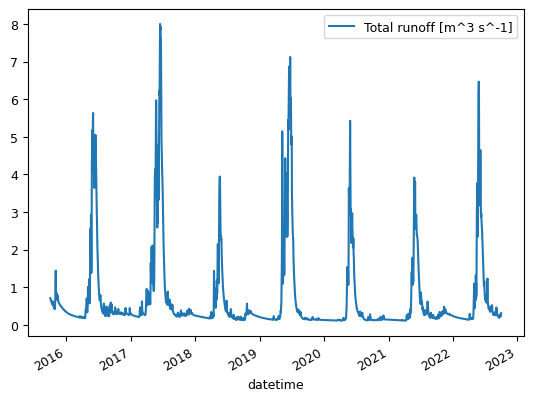

In [9]:
new_df.plot()

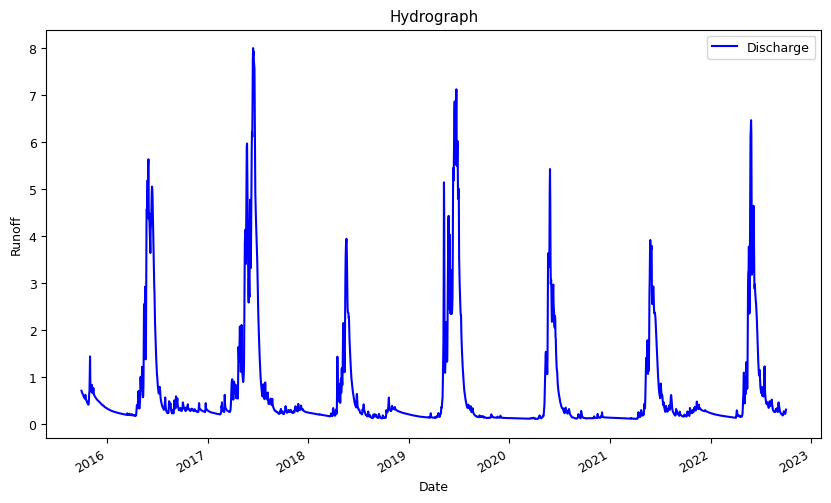

In [10]:
plt.figure(figsize=(10, 6)) # Adjust the figure size as necessary
plt.plot(new_df.index, new_df['Total runoff [m^3 s^-1]'], label='Discharge', color='blue') # Plot runoff data

# Adding title and labels
plt.title('Hydrograph')
plt.xlabel('Date')
plt.ylabel('Runoff')
plt.legend()

# Improve formatting of the x-axis dates
plt.gcf().autofmt_xdate()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


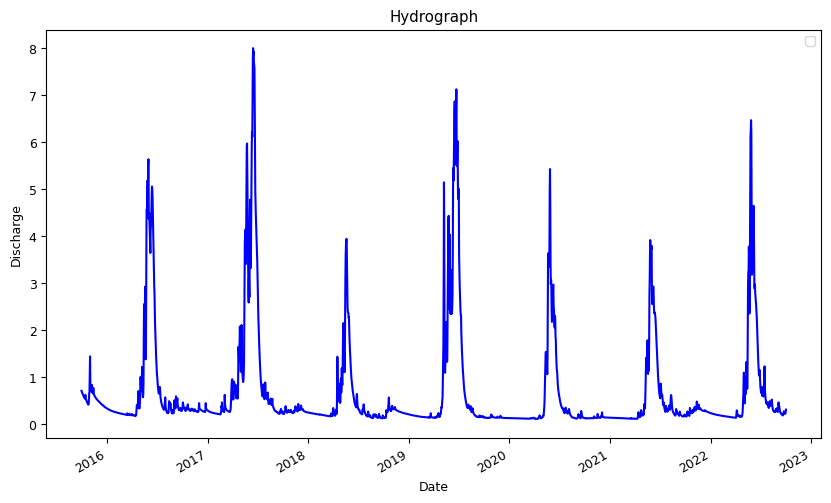

In [11]:
new_df.index = pd.to_datetime(new_df.index)
new_df.sort_index(inplace=True)


plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Total runoff [m^3 s^-1]'], color='blue')

plt.title('Hydrograph')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.legend()
plt.gcf().autofmt_xdate()  # Improve formatting of the x-axis dates
plt.show()


In [12]:
# final_df = sepBaseflow(new_df, 60, Area, k, dt_max=24, tp_min=6) 
final_df = sepBaseflow(new_df, 60, Area, k, dt_max=24, tp_min=6) 

Processing using a 60-minute interval...
2015-10-01 00:00:00
2015-10-01 01:00:00
2015-10-01 02:00:00
2015-10-01 03:00:00
2015-10-01 04:00:00
2015-10-01 05:00:00
2015-10-01 06:00:00
2015-10-01 07:00:00
2015-10-01 08:00:00
2015-10-01 09:00:00
2015-10-01 10:00:00
2015-10-01 11:00:00
2015-10-01 12:00:00
2015-10-01 13:00:00
2015-10-01 14:00:00
2015-10-01 15:00:00
2015-10-01 16:00:00
2015-10-01 17:00:00
2015-10-01 18:00:00
2015-10-01 19:00:00
2015-10-01 20:00:00
2015-10-01 21:00:00
2015-10-01 22:00:00
2015-10-01 23:00:00
2015-10-02 00:00:00
2015-10-02 01:00:00
2015-10-02 02:00:00
2015-10-02 03:00:00
2015-10-02 04:00:00
2015-10-02 05:00:00
2015-10-02 06:00:00
2015-10-02 07:00:00
2015-10-02 08:00:00
2015-10-02 09:00:00
2015-10-02 10:00:00
2015-10-02 11:00:00
2015-10-02 12:00:00
2015-10-02 13:00:00
2015-10-02 14:00:00
2015-10-02 15:00:00
2015-10-02 16:00:00
2015-10-02 17:00:00
2015-10-02 18:00:00
2015-10-02 19:00:00
2015-10-02 20:00:00
2015-10-02 21:00:00
2015-10-02 22:00:00
2015-10-02 23:00:00

In [13]:
#df.to_csv(r'/content/Separated_Baseflow.csv')

In [14]:
final_df.to_csv('Separated_Baseflow.csv')

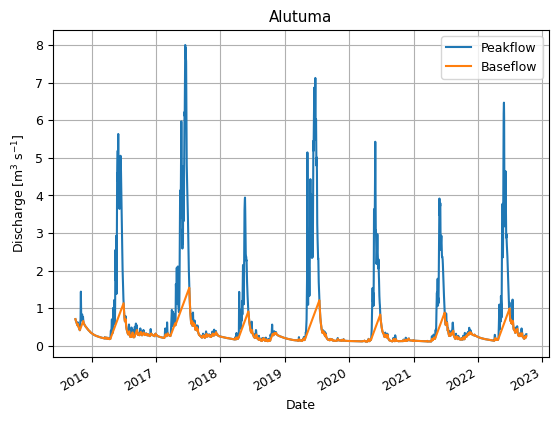

In [15]:
fig, ax = plt.subplots()
lines = plt.plot(final_df.index, final_df['Peakflow [m^3 s^-1]'] +  final_df['Baseflow [m^3 s^-1]'], final_df.index, final_df['Baseflow [m^3 s^-1]'])
plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Alutuma') 
plt.legend(['Peakflow', 'Baseflow'])
fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)

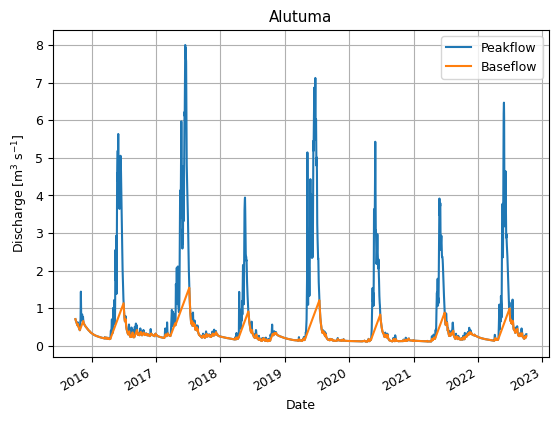

In [16]:
fig, ax = plt.subplots()
lines = plt.plot(final_df.index, final_df['Peakflow [m^3 s^-1]'] +  final_df['Baseflow [m^3 s^-1]'], final_df.index, final_df['Baseflow [m^3 s^-1]'])
plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Alutuma') 
plt.legend(['Peakflow', 'Baseflow'])
fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)

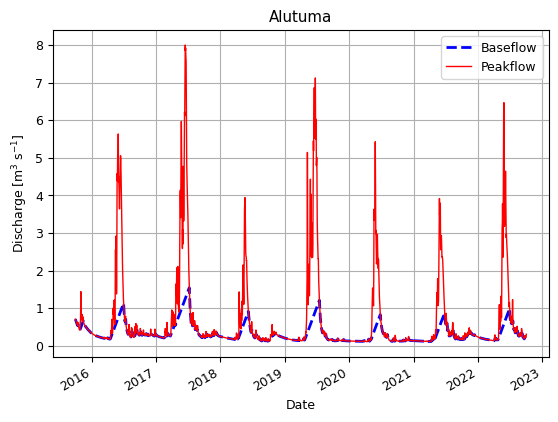

In [17]:
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame

fig, ax = plt.subplots()

# Plot Baseflow first, with a specific line style or width
ax.plot(final_df.index, final_df['Baseflow [m^3 s^-1]'], color='blue', linestyle='--', linewidth=2, label='Baseflow')

# Then, plot Peakflow, possibly with a different style or width
ax.plot(final_df.index, final_df['Total runoff interp. [m^3 s^-1]'], color='red', linewidth=1, label='Peakflow')

plt.xlabel('Date')
plt.ylabel('Discharge [m$^3$ s$^{-1}$]')
plt.grid(True)
plt.title('Alutuma')
plt.legend()

fig.autofmt_xdate()
plt.savefig('peakflow_baseflow.png', dpi=800)
